# Creation of the scraper
Functions which complete parts of the demo scraping.
*   1. Function: Gets the download link for the demo files for each match of a tournament.
*   2. Function: Downloads the demo files's rar containers.
*   3. Function: Counts the rar files in the given folder, thus allowing the 2. Function to check wether the download is completed.
*   4. Function: Unzips the downloaded rars, which contain the demo files for each match.

## Get the links to the given Tournament's matches
Function that expects one parameter:
*   *link*, a Tournament's results link from HLTV,

 from which it collects the links of the demo files' download page, and returns them in a string array.
 
 An example link: *https://www.hltv.org/results?content=demo&event=6809*

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import random


def get_tournament_demo_links(link):
    
    # Allow cookies
    browser = webdriver.Chrome()
    # Remove navigator.webdriver Flag using JavaScript
    browser.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
    browser.get(link)
    allowCookies = browser.find_element(By.ID, 'CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll')
    sleep(random.uniform(0.8, 2.8))
    allowCookies.click()
    sleep(2)

    # Get the match list items
    matches = browser.find_elements(By.CLASS_NAME, 'result-con')
    matchLinks = []
    for match in matches:
        matchLinks.append(match.find_element(By.CLASS_NAME, 'a-reset').get_attribute('href'))

    # Finish and quit browser, return links
    browser.quit()
    return matchLinks

## Function to count files in a given folder
This function expects two parameters: 
* *fileType* determines the sought file type
* *folderPath* defines in which folder the function will search for the given file extension

In this scenario, it is used to detect  wether the number of rar files changed, allowing us the check if the current demo file's dowload is complete

In [2]:
import os

def get_file_count(fileType, folderPath):

    fileExtensionList = []

    # Iterate directory
    for filename in os.listdir(folderPath):
        f = os.path.join(folderPath, filename)
        # Checking files and counting rars 
        if os.path.isfile(f):
            if '.' not in filename:
                continue
            fileExtensionList.append(filename.rsplit('.', 1)[1])
    
    fileCount = 0
    for file in fileExtensionList:
        if file == fileType:
            fileCount += 1
    
    return fileCount

## Download all matches' demos for the given Tourament
The function expects two parameters:
*   *tournament*, which must contain the **get_tournament_demo_links** function's returned links,
*   *downloadPath*, which determines where the demo files will be dowloaded.

This method runs through all the collected links of the gven tournament's matches, and downloads the demo files from it.
Tested with download path: r"D:\bme\MSc\csgo\data-scape\awpy\demo\download"

In [3]:
def download_demos(tournament, downloadPath):
    # Set download path
    chromeOptions = webdriver.ChromeOptions()
    prefs = {"download.default_directory" : downloadPath}
    chromeOptions.add_experimental_option("prefs",prefs)

    # Iterate through the matches' links
    for matchLink in tournament:

        # Start browser, allow cookies
        browser = webdriver.ChromiumEdge(options=chromeOptions)
        # Remove navigator.webdriver Flag using JavaScript
        browser.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
        browser.get(matchLink)
        allowCookies = browser.find_element(By.ID, 'CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll')
        sleep(random.uniform(0.8, 2.8))
        allowCookies.click()
        sleep(random.uniform(1, 1.9))

        # Find download button
        downloadLink = browser.find_element(By.CLASS_NAME, 'stream-box').get_attribute('data-demo-link')

        # Start download and wait while completed
        rarCountBeforeDownload = get_file_count('rar', downloadPath)
        browser.get('https://www.hltv.org' + downloadLink)
        while get_file_count('rar', downloadPath) == rarCountBeforeDownload:
            sleep(5)

        # Quit browser
        browser.quit()

## Function to unzip the demo files
Function that expects two parameters:
*   *sourceFolder*, which determines the rar files' source folder,
*   *destFolder*, the destination folder of the unzipping procedure.

This function iterates throught the given *sourceFolder*, unzips all the rar files and gets all the demos from them.

In [4]:
import patoolib
import os

def unzip_demo_files(sourceFolder, destFolder):

    # Iterate directory
    for filename in os.listdir(sourceFolder):
        filename = os.path.join(sourceFolder, filename)
        if 'sync' in filename:
            os.remove(filename)
            continue
        patoolib.extract_archive(filename, outdir=destFolder)

# All-in-one function
The combination of the previously created functions. In this section, the user can download and unpack whole tournaments' demo files using the *demo_downloader* funcion. It expects two parameters:
*   *link*: The HTML link of the tournament the user wishes to download. An example link: https://www.hltv.org/results?content=demo&event=6809
*   *path*: Both the download and unpack path.

##### Function implementation

In [5]:
def demo_downloader_for_tournaments(link, path):
    download_demos(get_tournament_demo_links(link), path + '/source')
    # unzip_demo_files(path + '\source', path)

##### Sandbox

In [7]:
demo_downloader_for_tournaments('https://www.hltv.org/results?event=6140', r'/media/szmp/Adat/BME/csgo-gnn/scrape-parse/demo')

# Module

In [6]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import random
import sys
import os

pd.set_option('display.max_columns', 100)
sys.path.append(os.path.abspath('./hltv-demo-scraper'))

from hltv_demo_scraper import HLTV_Demo_Scraper

In [13]:
HLTV_Demo_Scraper().demo_downloader_for_tournaments('https://www.hltv.org/results?event=7485', r'E:\csgo-gnn\data\matches-raw\cs2\2023\zip', r'E:\csgo-gnn\data\matches-raw\cs2\2023')

In [3]:
HLTV_Demo_Scraper().unzip_demo_files('../../data/matches-raw/cs2/2023/zip', '../../data/matches-raw/cs2/2023')

INFO patool: Extracting ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-2024-aurora-vs-mibr-bo3-WTc3uEVsZDra2_gdtosbfG.rar ...
INFO patool: running "C:\Program Files\7-Zip\7z.EXE" x -o../../data/matches-raw/cs2/2023 -- ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-2024-aurora-vs-mibr-bo3-WTc3uEVsZDra2_gdtosbfG.rar
INFO patool:     with input=
INFO patool: ... ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-2024-aurora-vs-mibr-bo3-WTc3uEVsZDra2_gdtosbfG.rar extracted to `../../data/matches-raw/cs2/2023'.
INFO patool: Extracting ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-2024-betboom-vs-falcons-bo3-Vs2aqVHybmmMIUkgtc2WlF.rar ...
INFO patool: running "C:\Program Files\7-Zip\7z.EXE" x -o../../data/matches-raw/cs2/2023 -- ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-2024-betboom-vs-falcons-bo3-Vs2aqVHybmmMIUkgtc2WlF.rar
INFO patool:     with input=
INFO patool: ... ../../data/matches-raw/cs2/2023/zip\betboom-dacha-belgrade-202

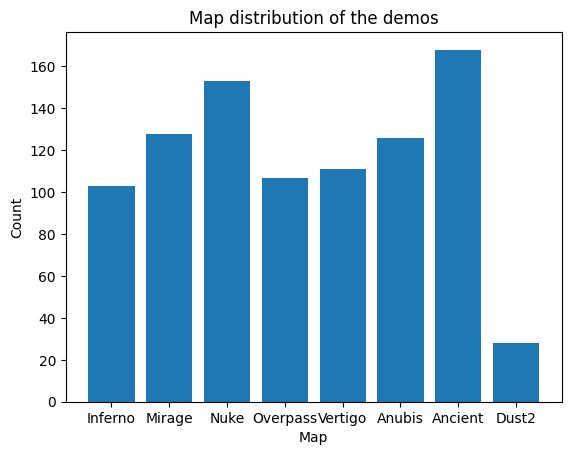

In [7]:
fileList = [file for file in os.listdir('../../data/matches-raw/cs2/2023') if file.endswith('.dem')]

inferno_count = len([file for file in fileList if 'inferno' in file])
mirage_count = len([file for file in fileList if 'mirage' in file])
nuke_count = len([file for file in fileList if 'nuke' in file])
overpass_count = len([file for file in fileList if 'overpass' in file])
vertigo_count = len([file for file in fileList if 'vertigo' in file])
anubis_count = len([file for file in fileList if 'anubis' in file])
ancient_count = len([file for file in fileList if 'ancient' in file])
dust2_count = len([file for file in fileList if 'dust2' in file])

# Histogram of the map distribution
map_counts = [inferno_count, mirage_count, nuke_count, overpass_count, vertigo_count, anubis_count, ancient_count, dust2_count]
map_names = ['Inferno', 'Mirage', 'Nuke', 'Overpass', 'Vertigo', 'Anubis', 'Ancient', 'Dust2']

plt.bar(map_names, map_counts)
plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Map distribution of the demos')
plt.show()